In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display

np.random.seed(42)
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.facecolor'] = 'lightgray'

In [2]:
payoff_matrix = {
    'Cooperate': {'Cooperate': (3, 3), 'Defect': (5, 0)},
    'Defect': {'Cooperate': (0, 5), 'Defect': (1, 1)}
}

df_game = pd.DataFrame(payoff_matrix)
df_game

,Cooperate,Defect
Cooperate,"(3, 3)","(0, 5)"
Defect,"(5, 0)","(1, 1)"


In [3]:
aleatorio = np.random.randint(0, 2, size=1000).tolist()

In [4]:
def pagos(df: pd.DataFrame, j1: list, j2: list):
    v1, v2 = [], []
    for i in range(len(j1)):
        if j1[i] == 0 and j2[i] == 0:
            v1.append(df.iloc[1, 1][0])
            v2.append(df.iloc[1, 1][1])

        elif j1[i] == 0 and j2[i] == 1:
            v1.append(df.iloc[1, 0][0])
            v2.append(df.iloc[1, 0][1])
        
        elif j1[i] == 1 and j2[i] == 0:
            v1.append(df.iloc[0, 1][0])
            v2.append(df.iloc[0, 1][1])
        
        elif j1[i] == 1 and j2[i] == 1:
            v1.append(df.iloc[0, 0][0])
            v2.append(df.iloc[0, 0][1])
    return v1, v2

In [5]:
class Players:
    def __init__(self, aleatorio:list):
        self.aleatorio = aleatorio

    def rick(self):
        j2 = [1]
        for i in range(len(self.aleatorio)):
            if i > 0 and self.aleatorio[i-1] == 0 and self.aleatorio[i] == 0:
                j2.extend([0] * (len(self.aleatorio) - i))
                break

            else:
                j2.append(1 if self.aleatorio[i] == 1 else 0)

        return j2[:len(self.aleatorio)]
    
    def friendman(self):
        j2 = [1]
        for i in range(len(self.aleatorio)):
            if i > 0 and self.aleatorio[i] == 0:
                j2.extend([0] * (len(self.aleatorio) - i))
                break

            else:
                j2.append(1 if self.aleatorio[i] == 1 else 0)

        return j2[:len(self.aleatorio)]
    
    def joss(self):
        j2 = [1] 
        for i in range(len(self.aleatorio)):  
            if (i + 1) % 10 == 0:
                j2.append(0)
            else:
                j2.append(1 if self.aleatorio[i] == 1 else 0)

        return j2[:len(self.aleatorio)]
    
    def graaskamp(self):
        j2 = [1] 
        for i in range(len(self.aleatorio)):  
            if (i + 1) % 20 == 0:
                j2.append(0)
            else:
                j2.append(1 if self.aleatorio[i] == 1 else 0)

        return j2[:len(self.aleatorio)]
    
    def tit_for_tat(self):
        j2 = [1]
        for i in range(len(self.aleatorio)):
            j2.append(1 if self.aleatorio[i] == 1 else 0)
        
        return j2[:len(self.aleatorio)]
    
    def tester(self):
        j2 = [0]
        
        if self.aleatorio[1] == 0:
            for i in range(len(self.aleatorio) - 1):
                j2.append(1 if self.aleatorio[i] == 1 else 0)
        else:
            for i in range(len(self.aleatorio) - 1):
                j2.append(1 if i % 2 == 0 else 0)
        
        return j2[:len(self.aleatorio)]
    
    def tit_for_2tat(self):
        j2 = [1]
        for i in range(len(self.aleatorio)-1):
            if i > 0 and self.aleatorio[i-1] == 0 and self.aleatorio[i] == 0:
                j2.append(0)
            else:
                j2.append(1 if self.aleatorio[i] == 1 else 0)

        return j2[:len(self.aleatorio)]
    
    def random(self):
         return np.random.randint(0, 2, size=len(self.aleatorio)).tolist()

In [6]:
aleatorio = np.random.randint(0, 2, size=1000).tolist()

rick = Players(aleatorio).rick()
friendman = Players(aleatorio).friendman()
joss = Players(aleatorio).joss()
graaskamp = Players(aleatorio).graaskamp()
tit_for_tat = Players(aleatorio).tit_for_tat()
tester = Players(aleatorio).tester()
tit_for_2tat = Players(aleatorio).tit_for_2tat()
random = Players(aleatorio).random()

players_strats = [rick, friendman, joss, graaskamp, tit_for_tat, tester, tit_for_2tat, random]
players_names = ['Rick', 'Friendman', 'Joss', 'Graaskamp', 'Tit for Tat', 'Tester', 'Tit for 2Tat', 'Random']

## Todos vs Aleatorio

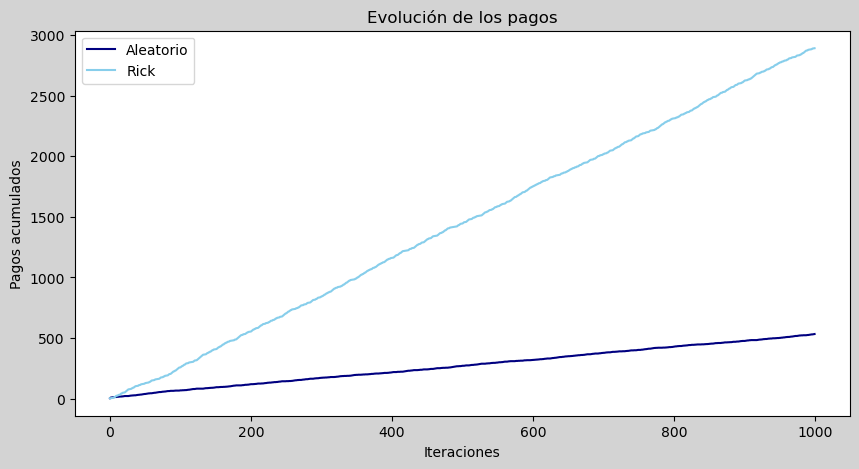

Pagos acumulados de Aleatorio: 533
Pagos acumulados de Rick: 2893


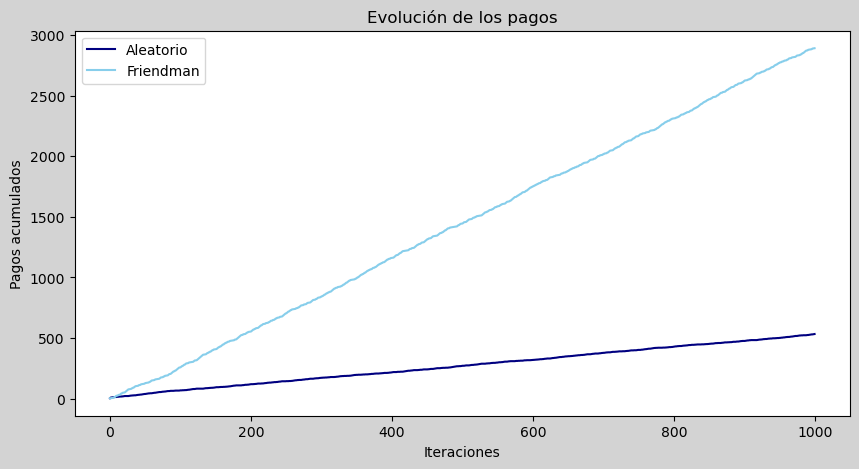

Pagos acumulados de Aleatorio: 533
Pagos acumulados de Friendman: 2893


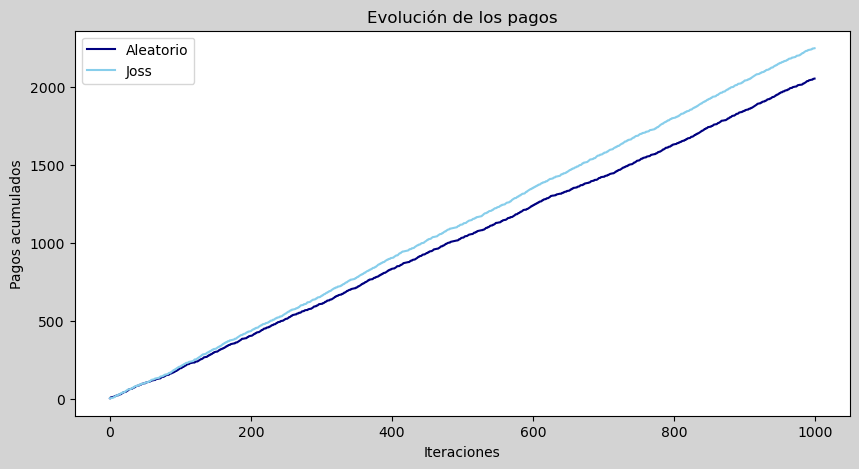

Pagos acumulados de Aleatorio: 2055
Pagos acumulados de Joss: 2250


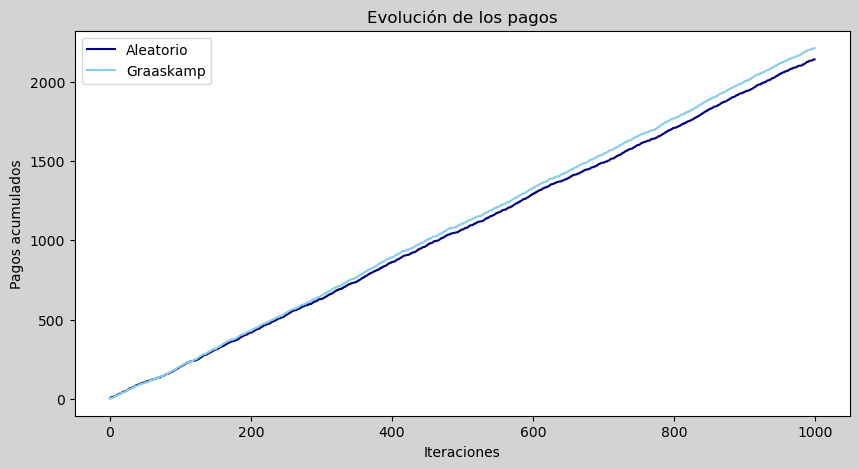

Pagos acumulados de Aleatorio: 2143
Pagos acumulados de Graaskamp: 2213


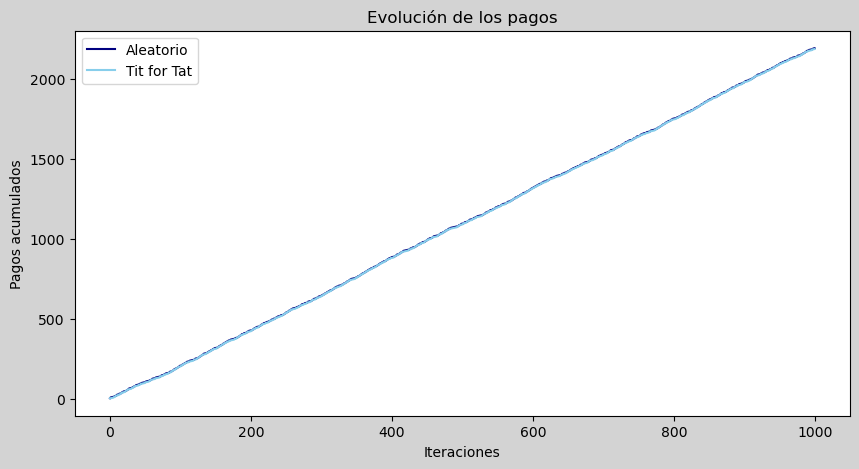

Pagos acumulados de Aleatorio: 2195
Pagos acumulados de Tit for Tat: 2190


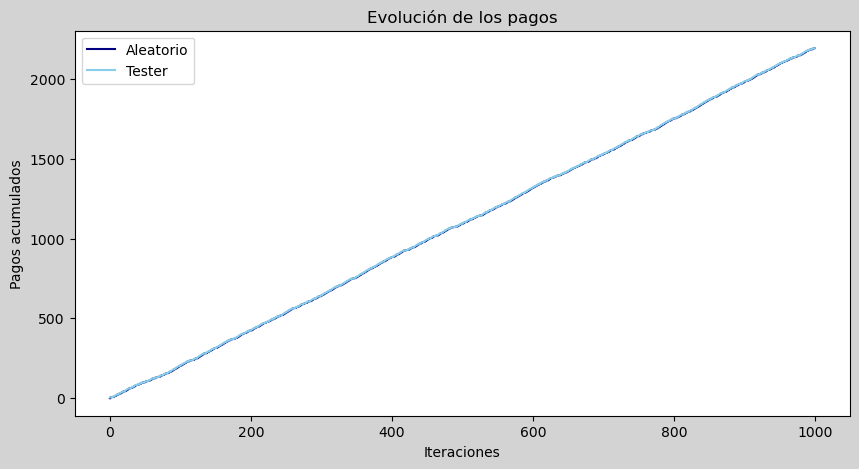

Pagos acumulados de Aleatorio: 2192
Pagos acumulados de Tester: 2192


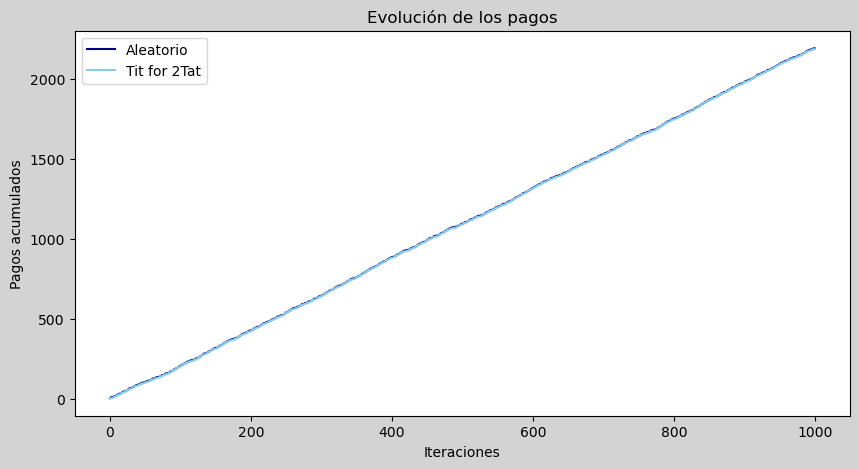

Pagos acumulados de Aleatorio: 2195
Pagos acumulados de Tit for 2Tat: 2190


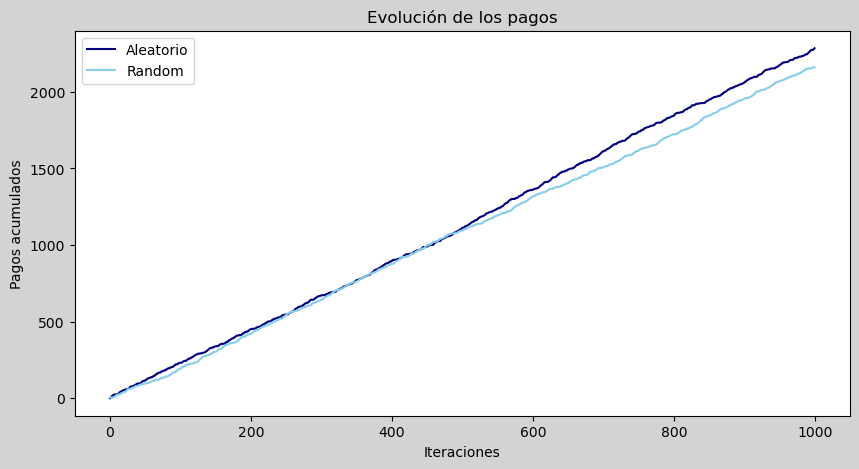

Pagos acumulados de Aleatorio: 2285
Pagos acumulados de Random: 2160


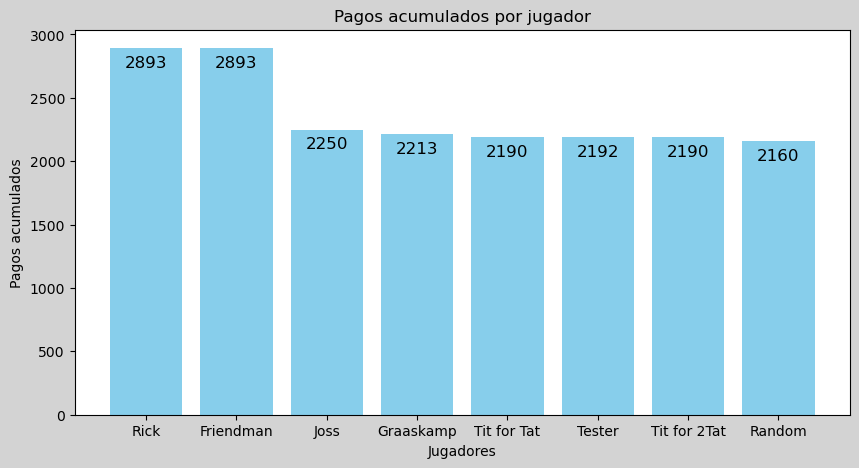

,Jugadores,Ganancia Promedio
0,Rick,2.893
1,Friendman,2.893
2,Joss,2.250
3,Graaskamp,2.213
4,Tit for Tat,2.190
5,Tester,2.192
6,Tit for 2Tat,2.190
7,Random,2.160


In [7]:
pagos_acumulados = []

for player, name in zip(players_strats, players_names):

    v1, v2 = pagos(df_game, aleatorio, player)

    pagos_acumulados.append(v2)

    plt.plot(np.cumsum(v1), label='Aleatorio', c = 'navy')
    plt.plot(np.cumsum(v2), label=f'{name}', c = 'skyblue')
    plt.legend()
    plt.title('Evolución de los pagos')
    plt.xlabel('Iteraciones')
    plt.ylabel('Pagos acumulados')
    plt.show()

    print(f'Pagos acumulados de Aleatorio: {np.cumsum(v1)[-1]}')
    print(f'Pagos acumulados de {name}: {np.cumsum(v2)[-1]}')

plt.bar(players_names, [np.sum(pagos) for pagos in pagos_acumulados], color='skyblue')
plt.title('Pagos acumulados por jugador')
plt.xlabel('Jugadores')
plt.ylabel('Pagos acumulados')
for i, total in enumerate([np.sum(pagos) for pagos in pagos_acumulados]):
    plt.text(i, total - 150, str(total), ha='center', fontsize=12, color="black")
plt.show()

resultados = pd.DataFrame({
    'Jugadores': players_names,
    'Ganancia Promedio': [np.mean(pagos) for pagos in pagos_acumulados]
})
resultados

## Código de Competencia

In [8]:
class Players:
    def __init__(self, opponent:list):
        self.opponent = opponent

    def rick(self):
        j2 = [1]
        for i in range(len(self.opponent)):
            if i > 0 and self.opponent[i-1] == 0 and self.opponent[i] == 0:
                j2.extend([0] * (len(self.opponent) - i))
                break
            else:
                j2.append(1 if self.opponent[i] == 1 else 0)
        return j2[:len(self.opponent)]
    
    def friendman(self):
        j2 = [1]
        for i in range(len(self.opponent)):
            if i > 0 and self.opponent[i] == 0:
                j2.extend([0] * (len(self.opponent) - i))
                break
            else:
                j2.append(1 if self.opponent[i] == 1 else 0)
        return j2[:len(self.opponent)]
    
    def joss(self):
        j2 = [1]
        for i in range(len(self.opponent)):
            if (i + 1) % 10 == 0:
                j2.append(0)
            else:
                j2.append(1 if self.opponent[i] == 1 else 0)
        return j2[:len(self.opponent)]
    
    def graaskamp(self):
        j2 = [1]
        for i in range(len(self.opponent)):
            if (i + 1) % 20 == 0:
                j2.append(0)
            else:
                j2.append(1 if self.opponent[i] == 1 else 0)
        return j2[:len(self.opponent)]
    
    def tit_for_tat(self):
        j2 = [1]
        for i in range(len(self.opponent)):
            j2.append(1 if self.opponent[i] == 1 else 0)
        return j2[:len(self.opponent)]
    
    def tester(self):
        j2 = [0]
        if self.opponent[1] == 0:
            for i in range(len(self.opponent) - 1):
                j2.append(1 if self.opponent[i] == 1 else 0)
        else:
            for i in range(len(self.opponent) - 1):
                j2.append(1 if i % 2 == 0 else 0)
        return j2[:len(self.opponent)]
    
    def tit_for_2tat(self):
        j2 = [1]
        for i in range(len(self.opponent) - 1):
            if i > 0 and self.opponent[i-1] == 0 and self.opponent[i] == 0:
                j2.append(0)
            else:
                j2.append(1 if self.opponent[i] == 1 else 0)
        return j2[:len(self.opponent)]
    
    def random(self):
        return np.random.randint(0, 2, size=len(self.opponent)).tolist()

## Todos vs Rick

In [9]:
aleatorio = np.random.randint(0, 2, size=1000).tolist()
rick = Players(aleatorio).rick()

players = Players(rick)
friendman = players.friendman()
joss = players.joss()
graaskamp = players.graaskamp()
tit_for_tat = players.tit_for_tat()
tester = players.tester()
tit_for_2tat = players.tit_for_2tat()
random = players.random()

players_strats = [friendman, joss, graaskamp, tit_for_tat, tester, tit_for_2tat, random]
players_names = ['Friendman', 'Joss', 'Graaskamp', 'Tit for Tat', 'Tester', 'Tit for 2Tat', 'Random']

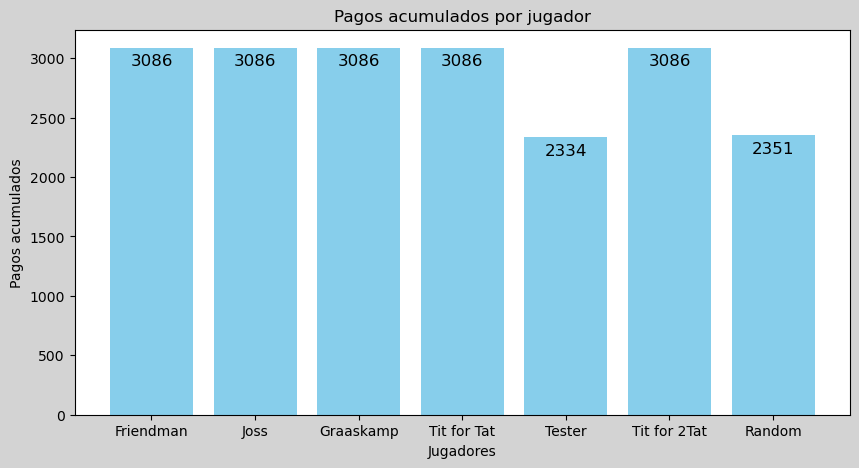

,Jugadores,Ganancia Promedio
0,Friendman,3.086
1,Joss,3.086
2,Graaskamp,3.086
3,Tit for Tat,3.086
4,Tester,2.334
5,Tit for 2Tat,3.086
6,Random,2.351


In [10]:
pagos_acumulados = []

for player, name in zip(players_strats, players_names):

    v1, v2 = pagos(df_game, aleatorio, player)

    pagos_acumulados.append(v2)

"""    plt.plot(np.cumsum(v1), label='Aleatorio', c = 'navy')
    plt.plot(np.cumsum(v2), label=f'{name}', c = 'skyblue')
    plt.legend()
    plt.title('Evolución de los pagos')
    plt.xlabel('Iteraciones')
    plt.ylabel('Pagos acumulados')
    plt.show()

    print(f'Pagos acumulados de Aleatorio: {np.cumsum(v1)[-1]}')
    print(f'Pagos acumulados de {name}: {np.cumsum(v2)[-1]}')"""

plt.bar(players_names, [np.sum(pagos) for pagos in pagos_acumulados], color='skyblue')
plt.title('Pagos acumulados por jugador')
plt.xlabel('Jugadores')
plt.ylabel('Pagos acumulados')
for i, total in enumerate([np.sum(pagos) for pagos in pagos_acumulados]):
    plt.text(i, total - 150, str(total), ha='center', fontsize=12, color="black")
plt.show()

resultados = pd.DataFrame({
    'Jugadores': players_names,
    'Ganancia Promedio': [np.mean(pagos) for pagos in pagos_acumulados]
})
resultados

## Todos vs Friendman

In [11]:
aleatorio = np.random.randint(0, 2, size=1000).tolist()
friendman = Players(aleatorio).friendman()

players = Players(friendman)
rick = players.rick()
joss = players.joss()
graaskamp = players.graaskamp()
tit_for_tat = players.tit_for_tat()
tester = players.tester()
tit_for_2tat = players.tit_for_2tat()
random = players.random()

players_strats = [rick, joss, graaskamp, tit_for_tat, tester, tit_for_2tat, random]
players_names = ['Rick', 'Joss', 'Graaskamp', 'Tit for Tat', 'Tester', 'Tit for 2Tat', 'Random']

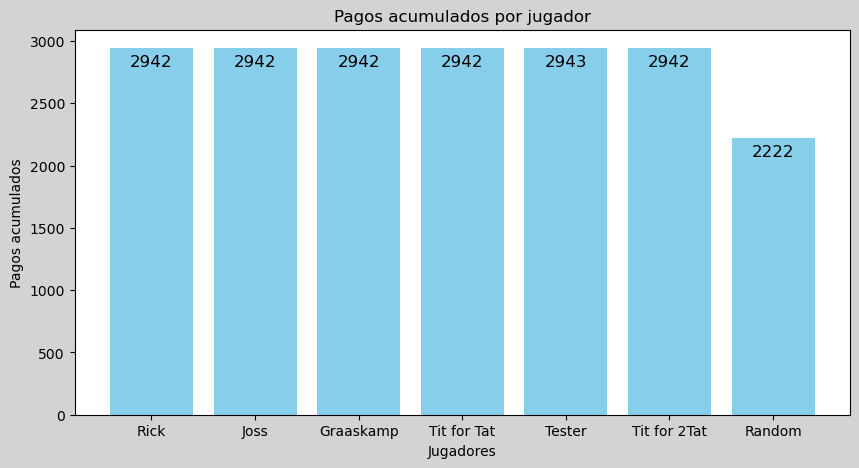

,Jugadores,Ganancia Promedio
0,Rick,2.942
1,Joss,2.942
2,Graaskamp,2.942
3,Tit for Tat,2.942
4,Tester,2.943
5,Tit for 2Tat,2.942
6,Random,2.222


In [12]:
pagos_acumulados = []

for player, name in zip(players_strats, players_names):

    v1, v2 = pagos(df_game, aleatorio, player)

    pagos_acumulados.append(v2)

"""    plt.plot(np.cumsum(v1), label='Aleatorio', c = 'navy')
    plt.plot(np.cumsum(v2), label=f'{name}', c = 'skyblue')
    plt.legend()
    plt.title('Evolución de los pagos')
    plt.xlabel('Iteraciones')
    plt.ylabel('Pagos acumulados')
    plt.show()

    print(f'Pagos acumulados de Aleatorio: {np.cumsum(v1)[-1]}')
    print(f'Pagos acumulados de {name}: {np.cumsum(v2)[-1]}')"""

plt.bar(players_names, [np.sum(pagos) for pagos in pagos_acumulados], color='skyblue')
plt.title('Pagos acumulados por jugador')
plt.xlabel('Jugadores')
plt.ylabel('Pagos acumulados')
for i, total in enumerate([np.sum(pagos) for pagos in pagos_acumulados]):
    plt.text(i, total - 150, str(total), ha='center', fontsize=12, color="black")
plt.show()

resultados = pd.DataFrame({
    'Jugadores': players_names,
    'Ganancia Promedio': [np.mean(pagos) for pagos in pagos_acumulados]
})
resultados

## Todos vs Joss

In [13]:
aleatorio = np.random.randint(0, 2, size=1000).tolist()
joss = Players(aleatorio).joss()

players = Players(joss)
rick = players.rick()
friendman = players.friendman()
graaskamp = players.graaskamp()
tit_for_tat = players.tit_for_tat()
tester = players.tester()
tit_for_2tat = players.tit_for_2tat()
random = players.random()

players_strats = [rick, friendman, graaskamp, tit_for_tat, tester, tit_for_2tat, random]
players_names = ['Rick', 'Friendman', 'Graaskamp', 'Tit for Tat', 'Tester', 'Tit for 2Tat', 'Random']

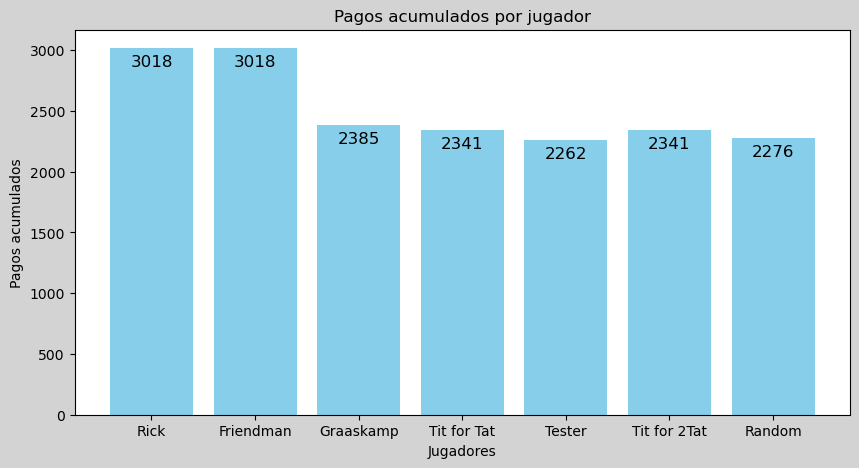

,Jugadores,Ganancia Promedio
0,Rick,3.018
1,Friendman,3.018
2,Graaskamp,2.385
3,Tit for Tat,2.341
4,Tester,2.262
5,Tit for 2Tat,2.341
6,Random,2.276


In [14]:
pagos_acumulados = []

for player, name in zip(players_strats, players_names):

    v1, v2 = pagos(df_game, aleatorio, player)

    pagos_acumulados.append(v2)

"""    plt.plot(np.cumsum(v1), label='Aleatorio', c = 'navy')
    plt.plot(np.cumsum(v2), label=f'{name}', c = 'skyblue')
    plt.legend()
    plt.title('Evolución de los pagos')
    plt.xlabel('Iteraciones')
    plt.ylabel('Pagos acumulados')
    plt.show()

    print(f'Pagos acumulados de Aleatorio: {np.cumsum(v1)[-1]}')
    print(f'Pagos acumulados de {name}: {np.cumsum(v2)[-1]}')"""

plt.bar(players_names, [np.sum(pagos) for pagos in pagos_acumulados], color='skyblue')
plt.title('Pagos acumulados por jugador')
plt.xlabel('Jugadores')
plt.ylabel('Pagos acumulados')
for i, total in enumerate([np.sum(pagos) for pagos in pagos_acumulados]):
    plt.text(i, total - 150, str(total), ha='center', fontsize=12, color="black")
plt.show()

resultados = pd.DataFrame({
    'Jugadores': players_names,
    'Ganancia Promedio': [np.mean(pagos) for pagos in pagos_acumulados]
})
resultados

## Todos vs Graaskamp

In [15]:
aleatorio = np.random.randint(0, 2, size=1000).tolist()
graaskamp = Players(aleatorio).graaskamp()

players = Players(graaskamp)
rick = players.rick()
friendman = players.friendman()
joss = players.joss()
tit_for_tat = players.tit_for_tat()
tester = players.tester()
tit_for_2tat = players.tit_for_2tat()
random = players.random()

players_strats = [rick, friendman, joss, tit_for_tat, tester, tit_for_2tat, random]
players_names = ['Rick', 'Friendman', 'Joss', 'Tit for Tat', 'Tester', 'Tit for 2Tat', 'Random']

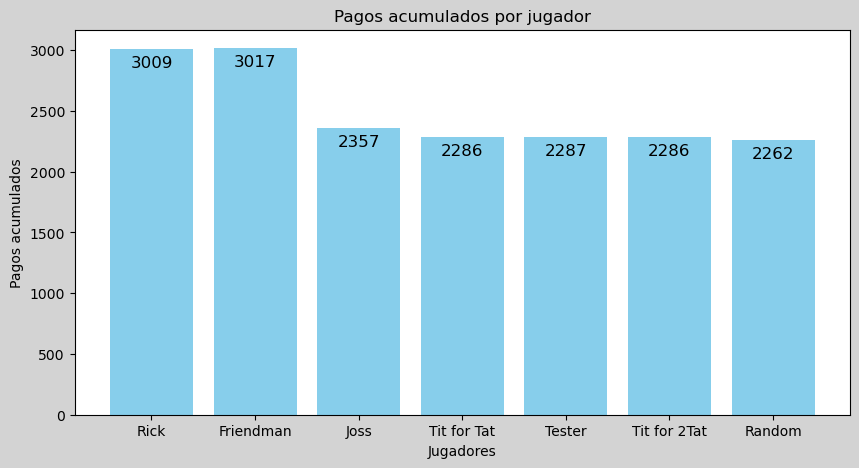

,Jugadores,Ganancia Promedio
0,Rick,3.009
1,Friendman,3.017
2,Joss,2.357
3,Tit for Tat,2.286
4,Tester,2.287
5,Tit for 2Tat,2.286
6,Random,2.262


In [16]:
pagos_acumulados = []

for player, name in zip(players_strats, players_names):

    v1, v2 = pagos(df_game, aleatorio, player)

    pagos_acumulados.append(v2)

"""    plt.plot(np.cumsum(v1), label='Aleatorio', c = 'navy')
    plt.plot(np.cumsum(v2), label=f'{name}', c = 'skyblue')
    plt.legend()
    plt.title('Evolución de los pagos')
    plt.xlabel('Iteraciones')
    plt.ylabel('Pagos acumulados')
    plt.show()

    print(f'Pagos acumulados de Aleatorio: {np.cumsum(v1)[-1]}')
    print(f'Pagos acumulados de {name}: {np.cumsum(v2)[-1]}')"""

plt.bar(players_names, [np.sum(pagos) for pagos in pagos_acumulados], color='skyblue')
plt.title('Pagos acumulados por jugador')
plt.xlabel('Jugadores')
plt.ylabel('Pagos acumulados')
for i, total in enumerate([np.sum(pagos) for pagos in pagos_acumulados]):
    plt.text(i, total - 150, str(total), ha='center', fontsize=12, color="black")
plt.show()

resultados = pd.DataFrame({
    'Jugadores': players_names,
    'Ganancia Promedio': [np.mean(pagos) for pagos in pagos_acumulados]
})
resultados

## Todos vs Tit for Tat

In [17]:
aleatorio = np.random.randint(0, 2, size=1000).tolist()
tit_for_tat = Players(aleatorio).tit_for_tat()

players = Players(tit_for_tat)
rick = players.rick()
friendman = players.friendman()
joss = players.joss()
graaskamp = players.graaskamp()
tester = players.tester()
tit_for_2tat = players.tit_for_2tat()
random = players.random()

players_strats = [rick, friendman, joss, graaskamp, tester, tit_for_2tat, random]
players_names = ['Rick', 'Friendman', 'Joss', 'Graaskamp', 'Tester', 'Tit for 2Tat', 'Random']

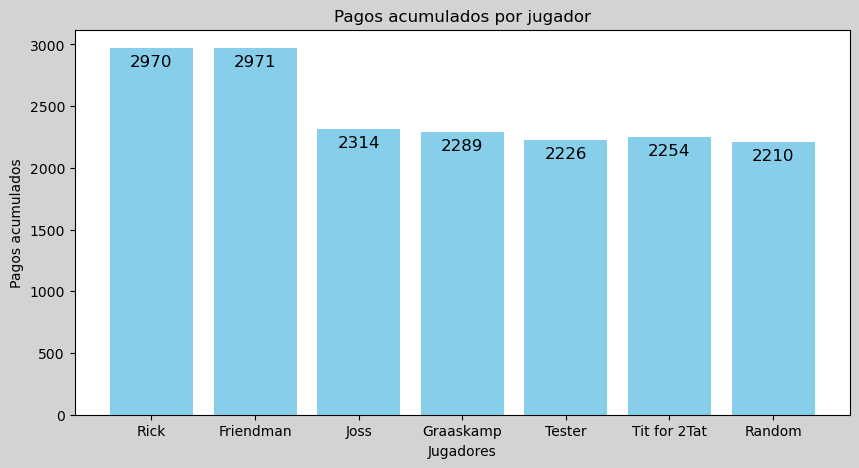

,Jugadores,Ganancia Promedio
0,Rick,2.970
1,Friendman,2.971
2,Joss,2.314
3,Graaskamp,2.289
4,Tester,2.226
5,Tit for 2Tat,2.254
6,Random,2.210


In [18]:
pagos_acumulados = []

for player, name in zip(players_strats, players_names):

    v1, v2 = pagos(df_game, aleatorio, player)

    pagos_acumulados.append(v2)

"""    plt.plot(np.cumsum(v1), label='Aleatorio', c = 'navy')
    plt.plot(np.cumsum(v2), label=f'{name}', c = 'skyblue')
    plt.legend()
    plt.title('Evolución de los pagos')
    plt.xlabel('Iteraciones')
    plt.ylabel('Pagos acumulados')
    plt.show()

    print(f'Pagos acumulados de Aleatorio: {np.cumsum(v1)[-1]}')
    print(f'Pagos acumulados de {name}: {np.cumsum(v2)[-1]}')"""

plt.bar(players_names, [np.sum(pagos) for pagos in pagos_acumulados], color='skyblue')
plt.title('Pagos acumulados por jugador')
plt.xlabel('Jugadores')
plt.ylabel('Pagos acumulados')
for i, total in enumerate([np.sum(pagos) for pagos in pagos_acumulados]):
    plt.text(i, total - 150, str(total), ha='center', fontsize=12, color="black")
plt.show()

resultados = pd.DataFrame({
    'Jugadores': players_names,
    'Ganancia Promedio': [np.mean(pagos) for pagos in pagos_acumulados]
})
resultados

## Todos vs Tester

In [19]:
aleatorio = np.random.randint(0, 2, size=1000).tolist()
tester = Players(aleatorio).tester()

players = Players(tester)
rick = players.rick()
friendman = players.friendman()
joss = players.joss()
graaskamp = players.graaskamp()
tit_for_tat = players.tit_for_tat()
tit_for_2tat = players.tit_for_2tat()
random = players.random()

players_strats = [rick, friendman, joss, graaskamp, tit_for_tat, tit_for_2tat, random]
players_names = ['Rick', 'Friendman', 'Joss', 'Graaskamp', 'Tit for Tat', 'Tit for 2Tat', 'Random']

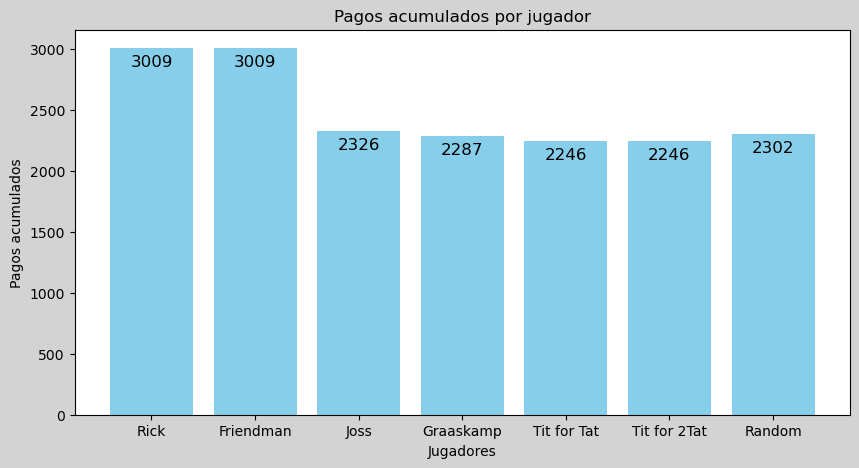

,Jugadores,Ganancia Promedio
0,Rick,3.009
1,Friendman,3.009
2,Joss,2.326
3,Graaskamp,2.287
4,Tit for Tat,2.246
5,Tit for 2Tat,2.246
6,Random,2.302


In [20]:
pagos_acumulados = []

for player, name in zip(players_strats, players_names):

    v1, v2 = pagos(df_game, aleatorio, player)

    pagos_acumulados.append(v2)

"""    plt.plot(np.cumsum(v1), label='Aleatorio', c = 'navy')
    plt.plot(np.cumsum(v2), label=f'{name}', c = 'skyblue')
    plt.legend()
    plt.title('Evolución de los pagos')
    plt.xlabel('Iteraciones')
    plt.ylabel('Pagos acumulados')
    plt.show()

    print(f'Pagos acumulados de Aleatorio: {np.cumsum(v1)[-1]}')
    print(f'Pagos acumulados de {name}: {np.cumsum(v2)[-1]}')"""

plt.bar(players_names, [np.sum(pagos) for pagos in pagos_acumulados], color='skyblue')
plt.title('Pagos acumulados por jugador')
plt.xlabel('Jugadores')
plt.ylabel('Pagos acumulados')
for i, total in enumerate([np.sum(pagos) for pagos in pagos_acumulados]):
    plt.text(i, total - 150, str(total), ha='center', fontsize=12, color="black")
plt.show()

resultados = pd.DataFrame({
    'Jugadores': players_names,
    'Ganancia Promedio': [np.mean(pagos) for pagos in pagos_acumulados]
})
resultados

## Todos vs Tit for 2Tat

In [21]:
aleatorio = np.random.randint(0, 2, size=1000).tolist()
tit_for_2tat = Players(aleatorio).tit_for_2tat()

players = Players(tit_for_2tat)
rick = players.rick()
friendman = players.friendman()
joss = players.joss()
graaskamp = players.graaskamp()
tit_for_tat = players.tit_for_tat()
tester = players.tester()
random = players.random()

players_strats = [rick, friendman, joss, graaskamp, tit_for_tat, tester, random]
players_names = ['Rick', 'Friendman', 'Joss', 'Graaskamp', 'Tit for Tat', 'Tester', 'Random']

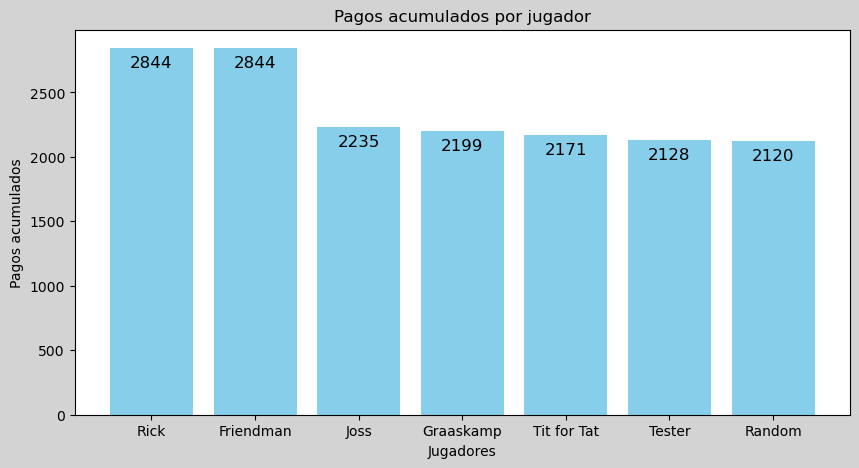

,Jugadores,Ganancia Promedio
0,Rick,2.844
1,Friendman,2.844
2,Joss,2.235
3,Graaskamp,2.199
4,Tit for Tat,2.171
5,Tester,2.128
6,Random,2.120


In [22]:
pagos_acumulados = []

for player, name in zip(players_strats, players_names):

    v1, v2 = pagos(df_game, aleatorio, player)

    pagos_acumulados.append(v2)

"""    plt.plot(np.cumsum(v1), label='Aleatorio', c = 'navy')
    plt.plot(np.cumsum(v2), label=f'{name}', c = 'skyblue')
    plt.legend()
    plt.title('Evolución de los pagos')
    plt.xlabel('Iteraciones')
    plt.ylabel('Pagos acumulados')
    plt.show()

    print(f'Pagos acumulados de Aleatorio: {np.cumsum(v1)[-1]}')
    print(f'Pagos acumulados de {name}: {np.cumsum(v2)[-1]}')"""

plt.bar(players_names, [np.sum(pagos) for pagos in pagos_acumulados], color='skyblue')
plt.title('Pagos acumulados por jugador')
plt.xlabel('Jugadores')
plt.ylabel('Pagos acumulados')
for i, total in enumerate([np.sum(pagos) for pagos in pagos_acumulados]):
    plt.text(i, total - 150, str(total), ha='center', fontsize=12, color="black")
plt.show()

resultados = pd.DataFrame({
    'Jugadores': players_names,
    'Ganancia Promedio': [np.mean(pagos) for pagos in pagos_acumulados]
})
resultados

## Todos vs Random

In [23]:
aleatorio = np.random.randint(0, 2, size=1000).tolist()
random = Players(aleatorio).random()

players = Players(random)
rick = players.rick()
friendman = players.friendman()
joss = players.joss()
graaskamp = players.graaskamp()
tit_for_tat = players.tit_for_tat()
tester = players.tester()
tit_for_2tat = players.tit_for_2tat()

players_strats = [rick, friendman, joss, graaskamp, tit_for_tat, tester, tit_for_2tat]
players_names = ['Rick', 'Friendman', 'Joss', 'Graaskamp', 'Tit for Tat', 'Tester', 'Tit for 2Tat']

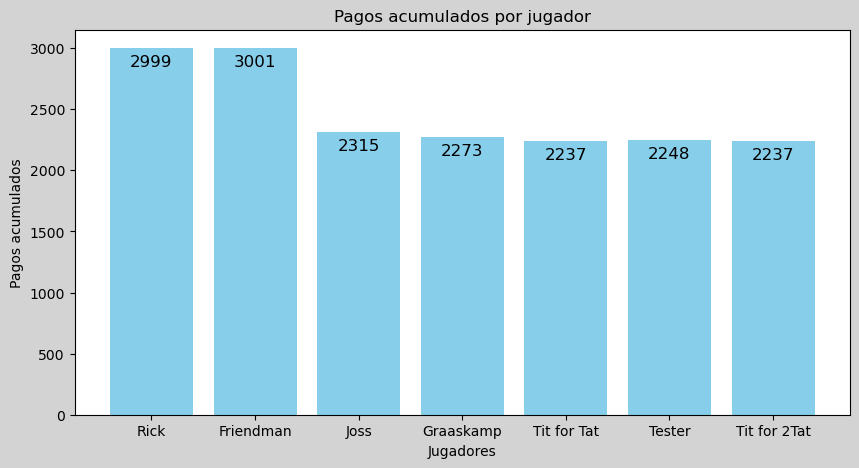

,Jugadores,Ganancia Promedio
0,Rick,2.999
1,Friendman,3.001
2,Joss,2.315
3,Graaskamp,2.273
4,Tit for Tat,2.237
5,Tester,2.248
6,Tit for 2Tat,2.237


In [24]:
pagos_acumulados = []

for player, name in zip(players_strats, players_names):

    v1, v2 = pagos(df_game, aleatorio, player)

    pagos_acumulados.append(v2)

"""    plt.plot(np.cumsum(v1), label='Aleatorio', c = 'navy')
    plt.plot(np.cumsum(v2), label=f'{name}', c = 'skyblue')
    plt.legend()
    plt.title('Evolución de los pagos')
    plt.xlabel('Iteraciones')
    plt.ylabel('Pagos acumulados')
    plt.show()

    print(f'Pagos acumulados de Aleatorio: {np.cumsum(v1)[-1]}')
    print(f'Pagos acumulados de {name}: {np.cumsum(v2)[-1]}')"""

plt.bar(players_names, [np.sum(pagos) for pagos in pagos_acumulados], color='skyblue')
plt.title('Pagos acumulados por jugador')
plt.xlabel('Jugadores')
plt.ylabel('Pagos acumulados')
for i, total in enumerate([np.sum(pagos) for pagos in pagos_acumulados]):
    plt.text(i, total - 150, str(total), ha='center', fontsize=12, color="black")
plt.show()

resultados = pd.DataFrame({
    'Jugadores': players_names,
    'Ganancia Promedio': [np.mean(pagos) for pagos in pagos_acumulados]
})
resultados